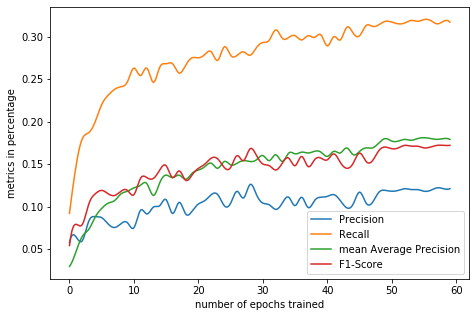

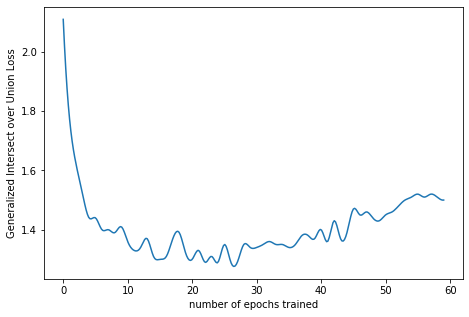

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline, BSpline

%matplotlib inline

with open("results_50epochs.txt") as f:
    results = f.read()

def smooth(x, y):
    x_new = np.linspace(x.min(), x.max(), 300)
    spl = make_interp_spline(x, y, k=3)
    return x_new, spl(x_new)

epoch = []
precision = []
recall = []
mAP = []
F1 = []
loss = []
for line in results.split("\n"):
    if line == "":
        continue
    values = line.split()
    epoch.append(float(values[0].split("/")[0]))
    precision.append(float(values[9]))
    recall.append(float(values[10]))
    mAP.append(float(values[11]))
    F1.append(float(values[12]))
    loss.append(float(values[13]))

epoch = np.array(epoch)
precision = np.array(precision)
recall = np.array(recall)
mAP = np.array(mAP)
F1 = np.array(F1)
loss = np.array(loss)

plt.figure(figsize=(7.5,5))
plt.plot(*smooth(epoch, precision), label="Precision")
plt.plot(*smooth(epoch, recall), label="Recall")
plt.plot(*smooth(epoch, mAP), label="mean Average Precision")
plt.plot(*smooth(epoch, F1), label="F1-Score")
plt.xlabel("number of epochs trained")
plt.ylabel("metrics in percentage")
plt.legend()
plt.savefig("Metrics_train.jpg")

plt.figure(figsize=(7.5, 5))
plt.xlabel("number of epochs trained")
plt.ylabel("Generalized Intersect over Union Loss")
plt.plot(*smooth(epoch, loss))
plt.savefig("GIoU_loss.jpg")

In [2]:
with open("results_classes_50epochs.txt") as f:
    results = f.read()

traffic_light = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
traffic_sign = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
car = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
person = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
bus = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
truck = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
rider = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
bike = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
motor = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}
train = {"Pr":[], "Rec":[], "mAP":[], "mF1":[]}

classes = [traffic_light, traffic_sign, car, person, bus, truck, rider, bike, motor, train]

for i, line in enumerate(results.split("\n")):
    if line == "":
        continue
    values = line.split()[-4:]
    cls_idx = i%10
    classes[cls_idx]["Pr"].append(float(values[0]))
    classes[cls_idx]["Rec"].append(float(values[1]))
    classes[cls_idx]["mAP"].append(float(values[2]))
    classes[cls_idx]["mF1"].append(float(values[3]))

Results for Pr :
Results for Rec :
Results for mAP :


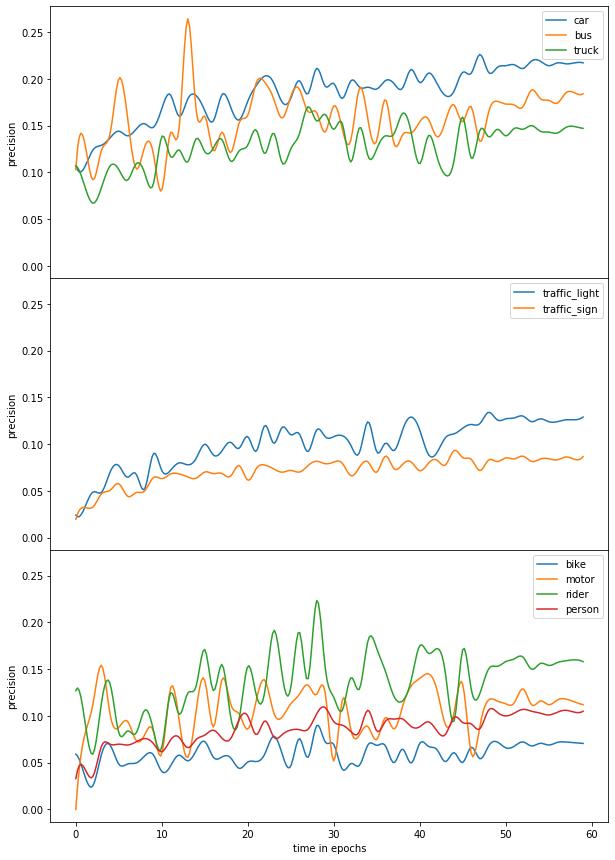

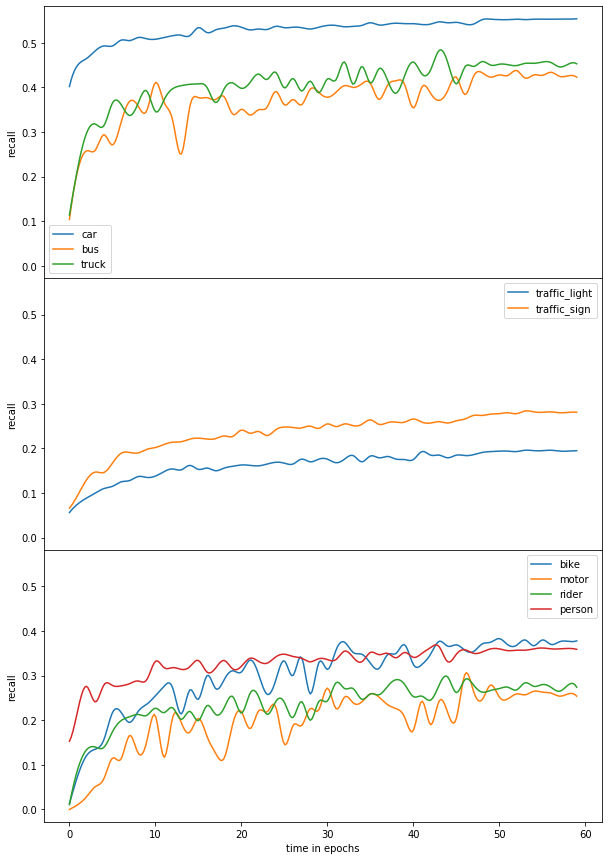

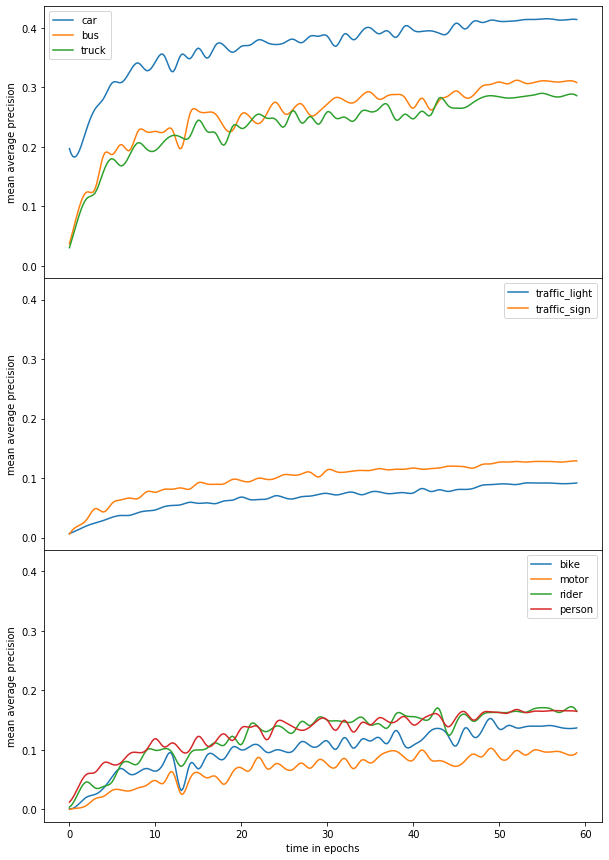

In [20]:
import inspect
import matplotlib.gridspec as gridspec

epochs = np.arange(60)

def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]

metrics = ["Pr", "Rec", "mAP", "mF1"]
groups = [[car, bus, truck],[traffic_light, traffic_sign], [bike, motor, rider, person]]


for metric, ylabel in zip(metrics, ["precision", "recall", "mean average precision"]):

    
    
    print("Results for", metric, ":")
    fig, axis = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(10,15))
    
    for group, ax in zip(groups, axis):
        for cls in group:
            ax.plot(*smooth(epochs, cls[metric]), label=retrieve_name(cls)[0])
        #plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        ax.legend()
        ax.set_ylabel(ylabel)
    plt.xlabel("time in epochs")
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.savefig(ylabel)





In [22]:
for cls in classes:
    
    print(retrieve_name(cls), cls["mAP"][59])

['traffic_light', 'cls'] 0.0918
['traffic_sign', 'cls'] 0.129
['car', 'cls'] 0.414
['person', 'cls'] 0.165
['bus', 'cls'] 0.308
['truck', 'cls'] 0.286
['rider', 'cls'] 0.165
['bike', 'cls'] 0.137
['motor', 'cls'] 0.0952
['train', 'cls'] 0.0
